## Pandas 单变量可视化

### 柱状图和分类数据

In [1]:
# 加载数据
import pandas as pd
reviews = pd.read_csv("data/winemag-data_first150k.csv", index_col=0)
reviews.head(3)


,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley


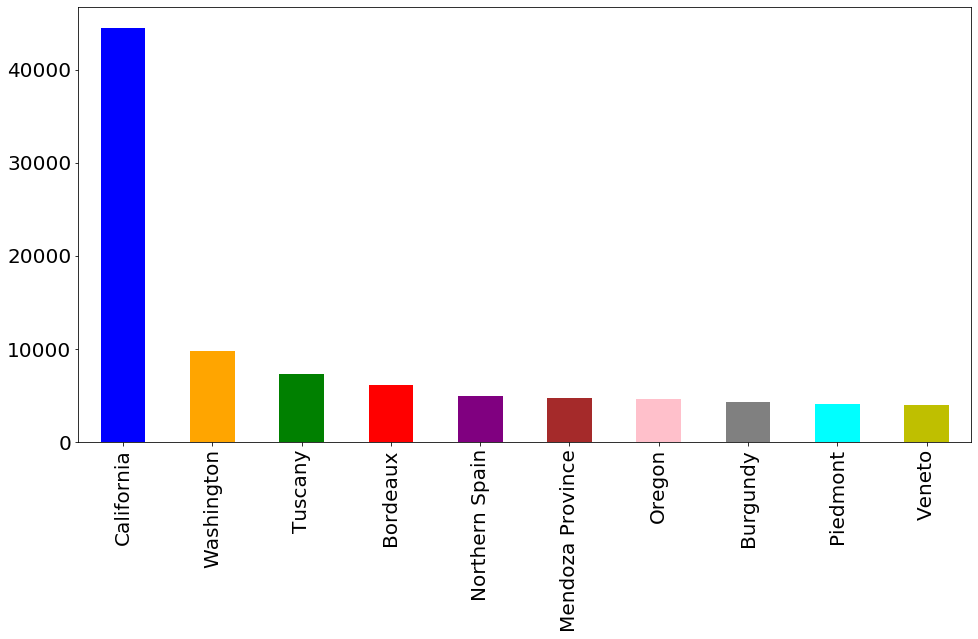

In [3]:
# 条形图是最简单最常用的可视化图表
# 在下面的案例中，将所有的葡萄酒品牌按照产区分类，看看哪个产区的葡萄酒品种多：
# figsize 绘图区域大小， fontsize 字体大小 color 颜色
text_kwargs=dict(figsize = (16,8),fontsize=20,color = ['b','orange','g','r','purple','brown','pink','gray','cyan','y'])
reviews['province'].value_counts().head(10).plot.bar(**text_kwargs)


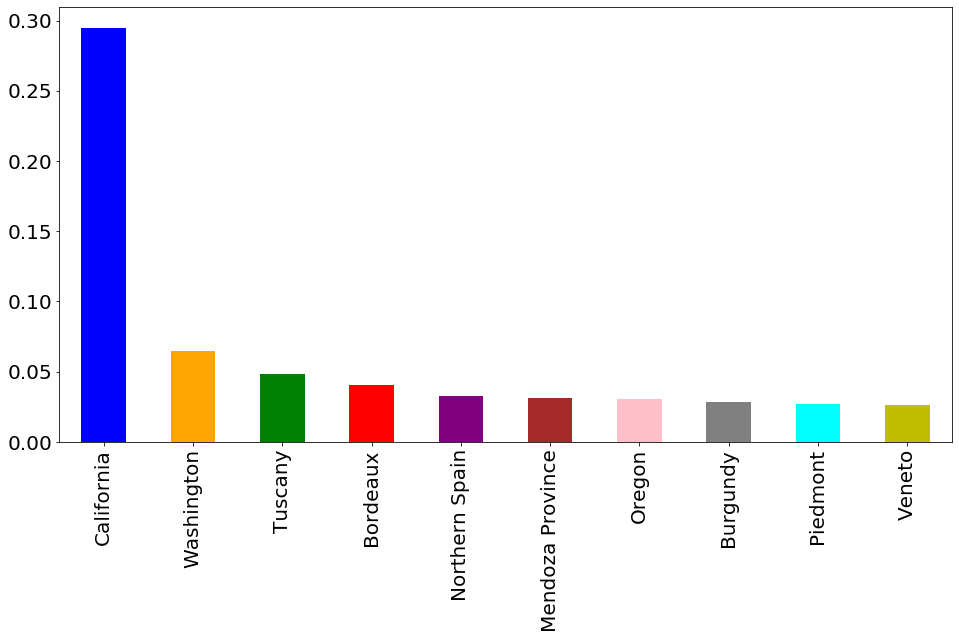

In [5]:
# 上面的图表说明加利福尼亚生产的葡萄酒比其他省都多
# 也可以折算成比例, 计算加利福尼亚葡萄酒占总数的百分比
(reviews['province'].value_counts().head(10) / len(reviews)).plot.bar(**text_kwargs)


# 在《葡萄酒杂志》（Wine Magazine）评述的葡萄酒中，加利福尼亚生产了近三分之一！


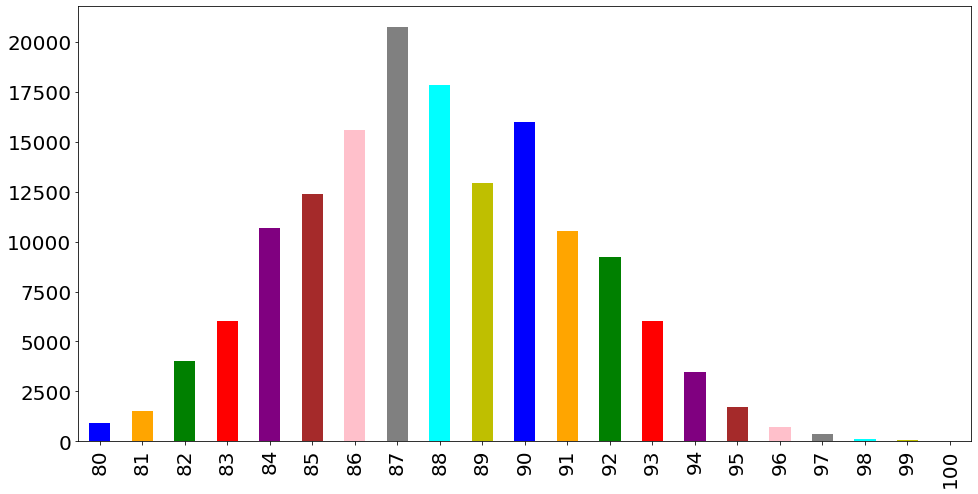

In [6]:
# 条形图(柱状图)非常灵活：
# 高度可以代表任何东西，只要它是数字即可
# 每个条形可以代表任何东西，只要它是一个类别即可。
# 也可以用来展示《葡萄酒杂志》（Wine Magazine）给出的评分数量的分布情况：
reviews['points'].value_counts().sort_index().plot.bar(**text_kwargs)


### 折线图

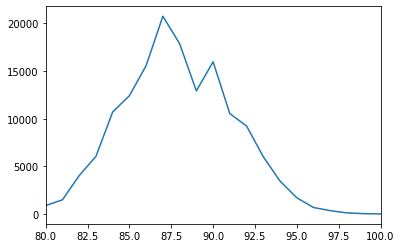

In [7]:
# 如果要绘制的数据不是类别值，而是连续值比较适合使用折线图
reviews['points'].value_counts().sort_index().plot.line()


### 面积图

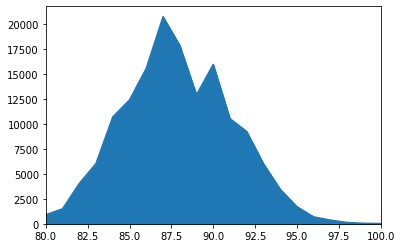

In [8]:
# 面积图就是在折线图的基础上，把折线下面的面积填充颜色
reviews['points'].value_counts().sort_index().plot.area()


### 直方图

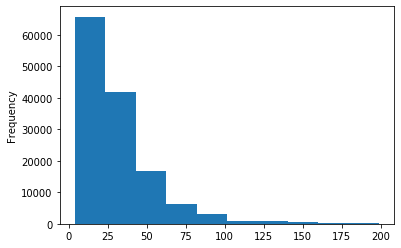

In [9]:
reviews[reviews['price'] < 200]['price'].plot.hist()


In [ ]:
# 直方图看起来很像条形图，
# 直方图是一种特殊的条形图，它可以将数据分成均匀的间隔，并用条形图显示每个间隔中有多少行，
# 直方图柱子的宽度代表了分组的间距，柱状图柱子宽度没有意义
# 直方图缺点：将数据分成均匀的间隔区间，所以它们对歪斜的数据的处理不是很好：


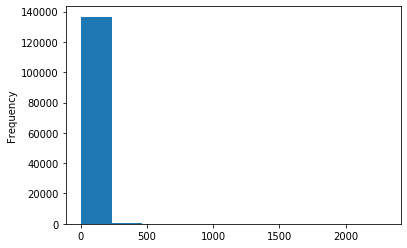

In [10]:
reviews['price'].plot.hist()
# 在第一个直方图中，将价格>200的葡萄酒排除了
# 在第二个直方图中，没有对价格做任何处理，由于有个别品种的酒价格极高，导致直方图的价格分布发生变化


In [11]:
#查看价格较高的葡萄酒情况
reviews[reviews['price'] >500]


,country,description,designation,points,price,province,region_1,region_2,variety,winery
2145,France,"Full of ripe fruit, opulent and concentrated, ...",NaN,100,848.0,Bordeaux,Pessac-Léognan,NaN,Bordeaux-style White Blend,Château Haut-Brion
2434,France,"With 83% Sémillon in the blend, this wine has ...",NaN,97,698.0,Bordeaux,Pessac-Léognan,NaN,Bordeaux-style White Blend,Château La Mission Haut-Brion
2453,Spain,This single-vineyard Carignan is living proof ...,El Perer,96,770.0,Catalonia,Priorat,NaN,Carignan,Marco Abella
8072,France,"This is the big one, one of the most treasured...",NaN,95,520.0,Burgundy,Montrachet,NaN,Chardonnay,Louis Latour
8838,France,"Solid and tannic, it perhaps lacks huge weight...",Les Quatre Journaux,93,740.0,Burgundy,Romanée-St.-Vivant,NaN,Pinot Noir,Louis Latour
...,...,...,...,...,...,...,...,...,...,...
127773,France,"While there is certainly plenty of wood here, ...",NaN,95,850.0,Bordeaux,Saint-Émilion,NaN,Bordeaux-style Red Blend,Château Ausone
128114,France,"A ripe wine, with a delicious citrus and pear ...",NaN,93,580.0,Bordeaux,Pessac-Léognan,NaN,Bordeaux-style White Blend,Château Laville Haut-Brion
129983,Italy,Winemaker Romano Dal Forno fearlessly confront...,Vigneto di Monte Lodoletta,90,535.0,Veneto,Amarone della Valpolicella,NaN,"Corvina, Rondinella, Molinara",Dal Forno Romano
136523,France,This is a beautifully shaped wine that rises f...,Marquis de Laguiche,96,596.0,Burgundy,Montrachet,NaN,Chardonnay,Joseph Drouhin


In [12]:
#查看数据shape
reviews.shape


(150930, 10)

In [13]:
reviews[reviews['price'] >500].shape


(73, 10)

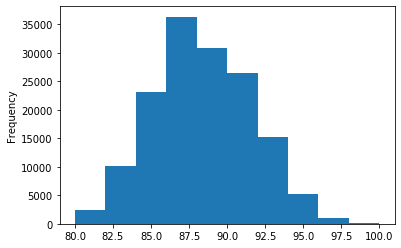

In [14]:
#对葡萄酒的评分不存在数据倾斜的情况，评分数据的分布情况比较适合用直方图展示
reviews['points'].plot.hist()


### 饼图

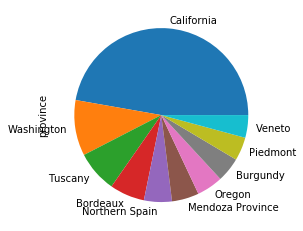

In [15]:
# 饼图也是一种常见的可视化形式
reviews['province'].value_counts().head(10).plot.pie()



In [17]:
# 饼图的缺陷：饼图只适合展示少量分类在整体的占比
# 如果分类比较多，必然每个分类的面积会比较小，这个时候很难比较两个类别
# 如果两个类别在饼图中彼此不相邻，很难进行比较
# 可以使用柱状图图来替换饼图


## Pandas 双变量可视化

### 散点图

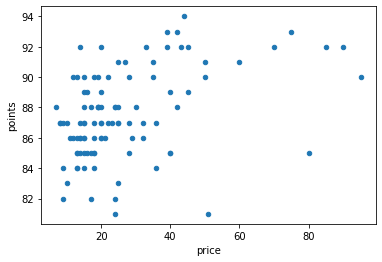

In [19]:
# 最简单的两个变量可视化图形是散点图，散点图中的一个点，可以表示两个变量
reviews[reviews['price'] < 100].sample(100).plot.scatter(x='price', y='points')



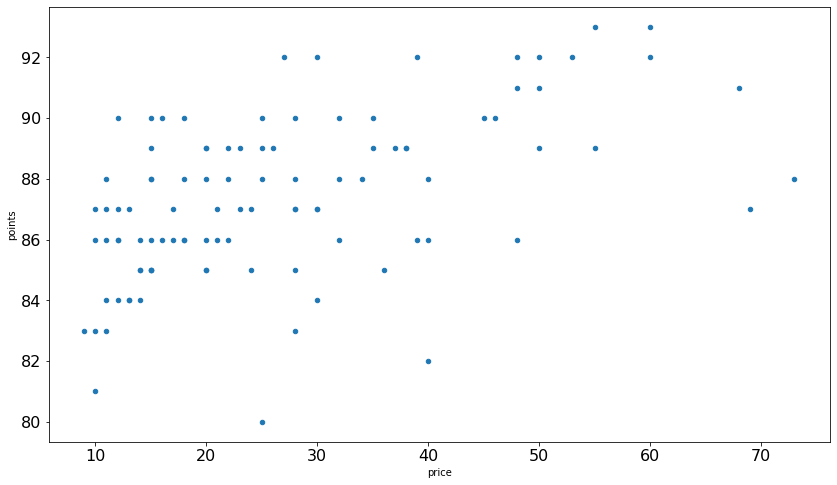

In [20]:
# 调整图形大小，字体大小，由于pandas的绘图功能是对Matplotlib绘图功能的封装，所以很多参数pandas 和 matplotlib都一样
reviews[reviews['price'] < 100].sample(100).plot.scatter(x='price', y='points',figsize=(14,8),fontsize = 16)


In [22]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'price')

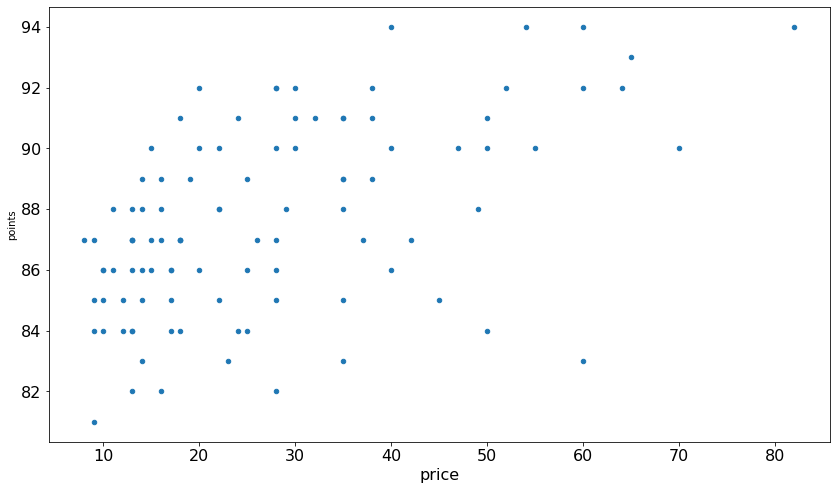

In [23]:
# 修改x轴 y轴标签字体
# 创建绘图区域和坐标轴
fig, axes = plt.subplots(ncols=1, figsize = (20,10))
# 使用pandas 在指定坐标轴内绘图
reviews[reviews['price'] < 100].sample(100).plot.scatter(x='price', y='points',figsize=(14,8),fontsize = 16,ax = axes)
# 通过坐标轴修改x y 标签内容和字体大小
axes.set_xlabel('price',fontdict={'fontsize':16})


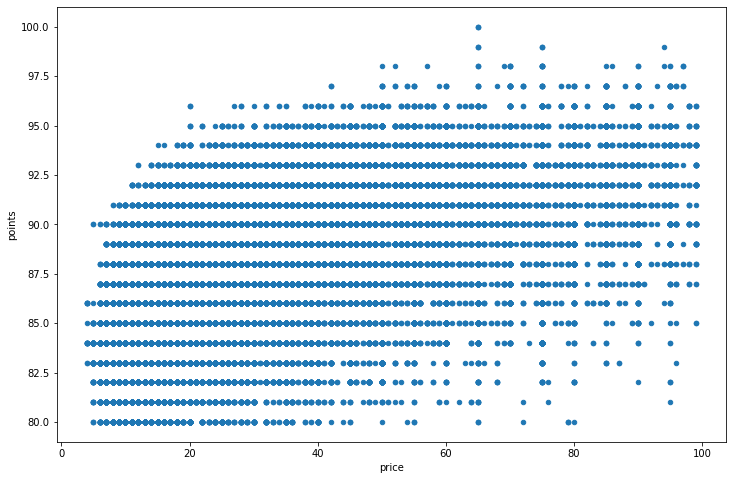

In [24]:
# 上图显示了价格和评分之间有一定的相关性：也就是说，价格较高的葡萄酒通常得分更高。
# 请注意，我们必须对数据进行采样，从所有数据中抽取100条数据，如果将全部数据（15万条）都绘制到散点图上，
# 会有很多点重叠在一起，不方便观察
reviews[reviews['price'] < 100].plot.scatter(x='price', y='points',figsize=(12,8))


### hexplot

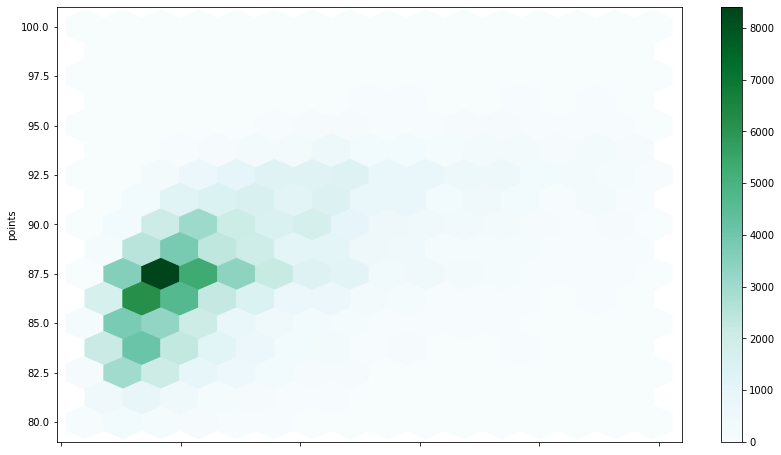

In [25]:

# hexplot将数据点聚合为六边形，然后根据其内的值为这些六边形上色：
reviews[reviews['price'] < 100].plot.hexbin(x='price', y='points', gridsize=15,figsize=(14,8))


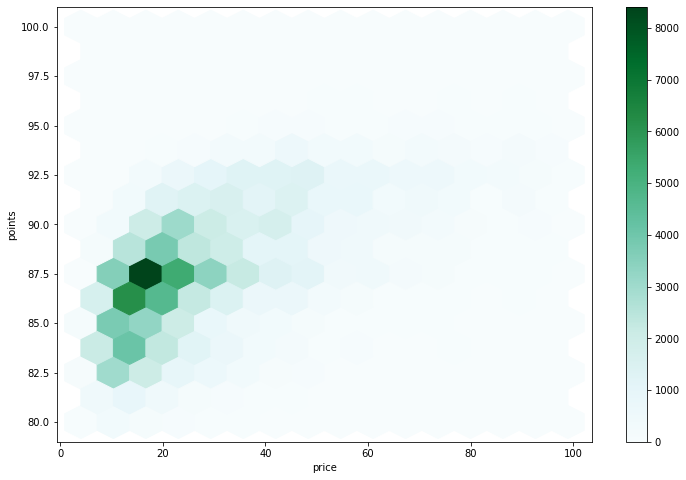

In [27]:
# 上图x轴坐标缺失，属于bug，可以通过调用matplotlib的api添加x坐标
fig, axes = plt.subplots(ncols=1, figsize = (12,8))
reviews[reviews['price'] < 100].plot.hexbin(x='price', y='points', gridsize=15,ax = axes)
axes.set_xticks([0,20,40,60,80,100])


### 堆叠图（Stacked plots）

In [28]:
# 将葡萄酒种类分组，找到最常见的五种葡萄酒
reviews.groupby(['variety'])['country'].count().sort_values(ascending = False)


variety
Chardonnay                  14482
Pinot Noir                  14288
Cabernet Sauvignon          12800
Red Blend                   10061
Bordeaux-style Red Blend     7347
                            ...  
Chinuri                         1
Petit Meslier                   1
Espadeiro                       1
Parraleta                       1
Erbaluce                        1
Name: country, Length: 632, dtype: int64

In [29]:
# 从结果中看出，最受欢迎的葡萄酒是，Chardonnay（霞多丽白葡萄酒），Pinot Noir（黑皮诺），
# Cabernet Sauvignon（赤霞珠），Red Blend（混酿红葡萄酒） ，Bordeaux-style Red Blend （波尔多风格混合红酒）


In [31]:
# 从数据中取出最常见的五种葡萄酒
top_5_wine = reviews[reviews.variety.isin(['Chardonnay','Pinot Noir','Cabernet Sauvignon','Red Blend','Bordeaux-style Red Blend'])]


In [32]:
# 通过透视表找到每种葡萄酒中，不同评分的数量
# 透视表计数
wine_counts = top_5_wine.pivot_table(index = ['points'],columns =['variety'],values='country',aggfunc='count')


In [33]:
# 修改列名
wine_counts.columns = ['Bordeaux-style Red Blend','Cabernet Sauvignon','Chardonnay','Pinot Noir','Red Blend']
wine_counts


,Bordeaux-style Red Blend,Cabernet Sauvignon,Chardonnay,Pinot Noir,Red Blend
points,,,,,
80,5.0,89.0,70.0,36.0,75.0
81,23.0,160.0,154.0,83.0,108.0
82,83.0,436.0,523.0,296.0,233.0
83,122.0,571.0,686.0,350.0,366.0
84,334.0,925.0,1170.0,757.0,623.0
85,379.0,1058.0,1299.0,903.0,608.0
86,467.0,1205.0,1525.0,1260.0,919.0
87,679.0,1589.0,1887.0,1784.0,1375.0
88,741.0,1160.0,1513.0,1586.0,1366.0


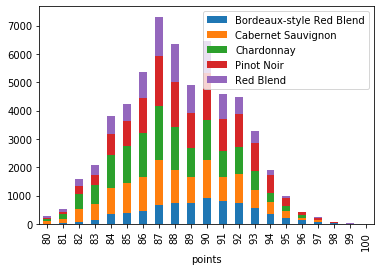

In [34]:
# 从上面的数据中看出，行列分别表示一个类别变量（评分，葡萄酒类别），行列交叉点表示计数，这类数据很适合用堆叠图展示
wine_counts.plot.bar(stacked=True)


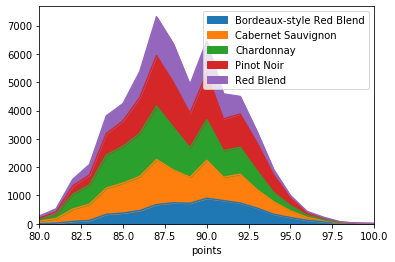

In [35]:
# 上图为堆积柱状图，适合展示少量类别的分类数据
# 面积堆积图：
wine_counts.plot.area()


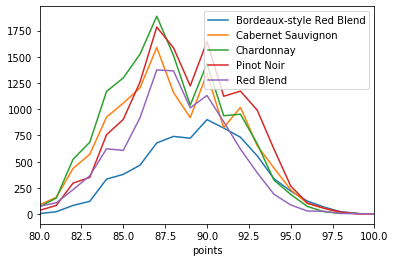

In [36]:
# 折线图在双变量可视化时，仍然非常有效
wine_counts.plot.line()
